In [2]:
import wrds
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

db = wrds.Connection()


Enter your WRDS username [giova]:djolitto
Enter your password:········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
Loading library list...
Done


In [28]:
#query for getting the data
data = db.raw_sql("select date, permco, ret, vol from crsp.dsf where permco in (7,35048, 8048, 21446, 20792) and date>='2001-01-01' and date<='2021-12-31'")

#add the column of log return 
data["ret"] = np.log(data["ret"] + 1)
print(data.head())



         date  permco       ret         vol
0  2001-01-02     7.0  0.000000   8202806.0
1  2001-01-03     7.0  0.096074  14854310.0
2  2001-01-04     7.0  0.041127  13349646.0
3  2001-01-05     7.0 -0.041127   7594080.0
4  2001-01-08     7.0  0.011385   6768672.0


In [4]:
#saving the dataframe into an csv
file = pd.DataFrame.to_csv(data,"file.csv")

#read the file that we have saved 
data = pd.read_csv("file.csv")

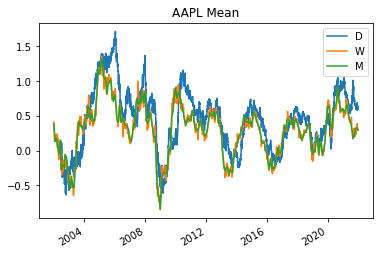

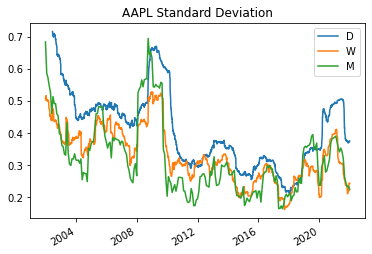

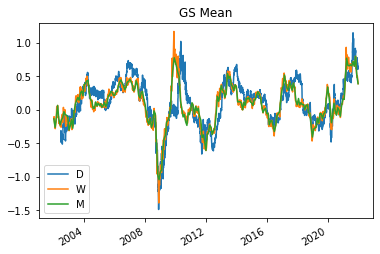

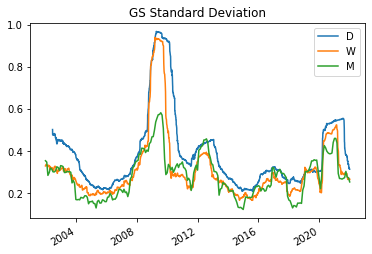

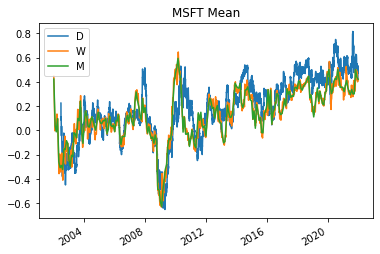

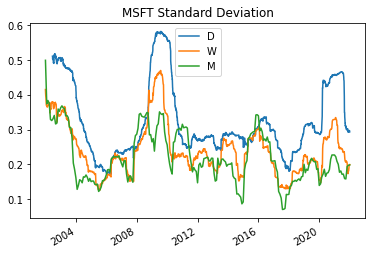

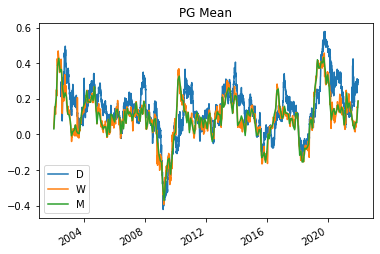

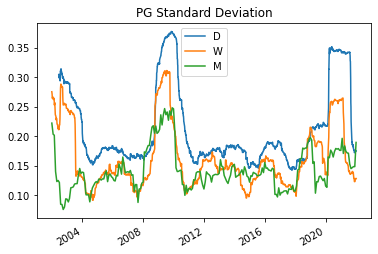

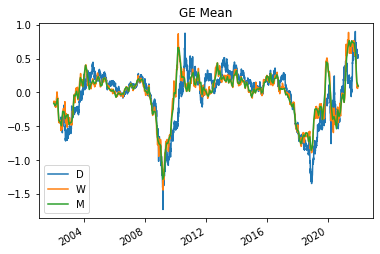

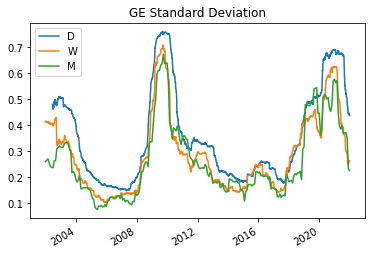

In [34]:
#we need to repeat what we have done in the exercise 3
#firstly we can create an index so the Dataframe will be indexed with date
index = pd.DatetimeIndex(data.loc[data["permco"] == 20792]["date"].values)

#creating a new dataframe where for each column we have log return of each company
#for the column name we have used the ticket name
#first we create an empty dataframe and then we add columns
newdata = pd.DataFrame(index = index)
newdata["AAPL"] = data.loc[data["permco"] == 7]["ret"].values
newdata["GS"] = data.loc[data["permco"] == 35048]["ret"].values
newdata["MSFT"] = data.loc[data["permco"] == 8048]["ret"].values
newdata["PG"] = data.loc[data["permco"] == 21446]["ret"].values
newdata["GE"] = data.loc[data["permco"] == 20792]["ret"].values

#calculating weekly log returns using the properties of log return
#we it is sufficient to sum up daily log returns
weekly_newdata = newdata.resample("W").sum()
monthly_newdata = newdata.resample("M").sum()

#calculating the annualized mean using a rolling windows from daily return
mean_from_daily = newdata.rolling(365).sum()
std_from_daily = newdata.rolling(365).std() * np.sqrt(365) 

#calculating the annualized mean using a rolling windows from monthly return
mean_from_monthly = monthly_newdata.rolling(12).sum() 
std_from_monthly = monthly_newdata.rolling(12).std() * np.sqrt(12) 

#calculating the annualized mean using a rolling windows from weekly return
mean_from_weekly = weekly_newdata.rolling(52).sum()
std_from_weekly = weekly_newdata.rolling(52).std() * np.sqrt(52)


#visualize the rolling windows estimations
for n in newdata.columns:    
    #test to see if it works
    mean_from_daily[n].plot(label="D")
    mean_from_weekly[n].plot(label="W")
    mean_from_monthly[n].plot(label="M") 
    plt.legend()
    plt.title(f"{n} Mean")
    plt.show()

    #test to see if it works
    std_from_daily[n].plot(label="D")
    std_from_weekly[n].plot(label="W")
    std_from_monthly[n].plot(label="M") 
    plt.legend()
    plt.title(f"{n} Standard Deviation")
    plt.show()




Daily variation in the estimation:
AAPL    0.442651
GS      0.344072
MSFT    0.255547
PG      0.142745
GE      0.402861
dtype: float64


Weekly variation in estimation:
AAPL    0.369274
GS      0.313264
MSFT    0.211362
PG      0.127356
GE      0.344202
dtype: float64


Monthly variation in the estimation:
AAPL    0.369868
GS      0.303292
MSFT    0.212320
PG      0.126168
GE      0.344120
dtype: float64


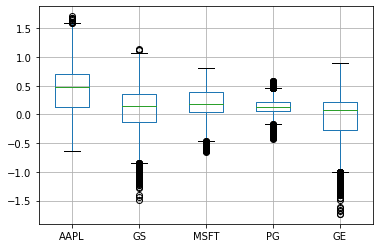

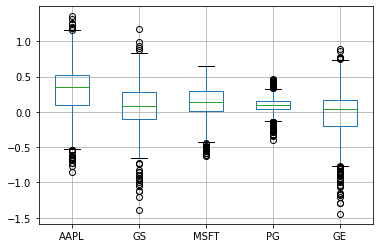

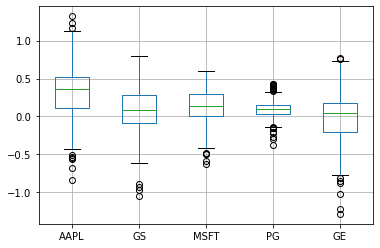

In [31]:
#we can see the variation in the estimation of the mean and of the standard deviation
#to analyse this variation we have used the standard deviation

print(f"Daily variation in the estimation:\n{mean_from_daily.std()}")
print("\n")
print(f"Weekly variation in estimation:\n{mean_from_weekly.std()}")
print("\n")
print(f"Monthly variation in the estimation:\n{mean_from_monthly.std()}")



#here I have reported also the boxplot useful to see the variation in data 
mean_from_daily.boxplot()
plt.show()

mean_from_weekly.boxplot()
plt.show()

mean_from_monthly.boxplot()
plt.show()



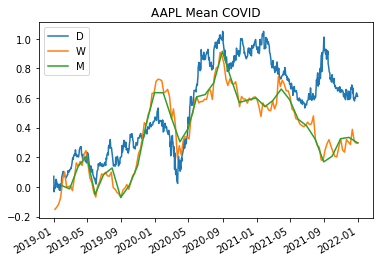

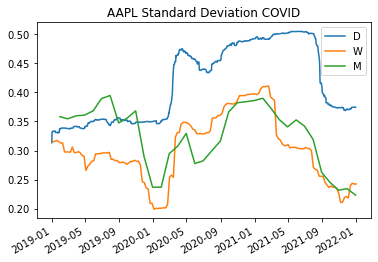

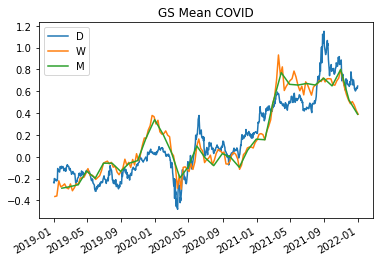

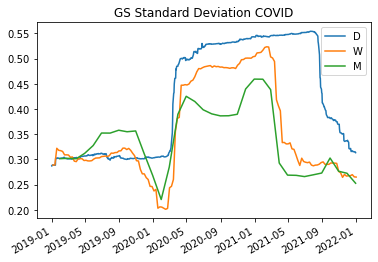

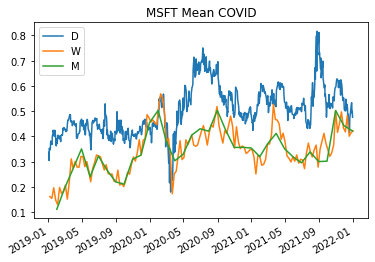

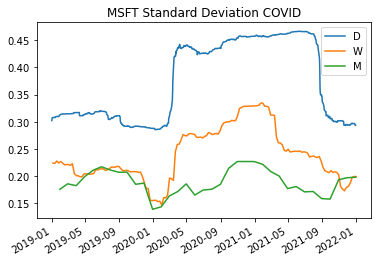

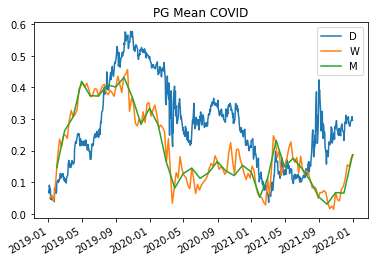

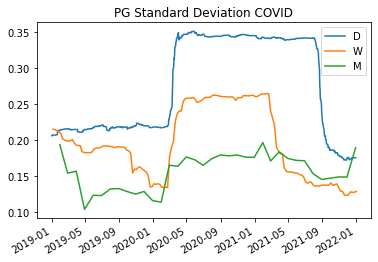

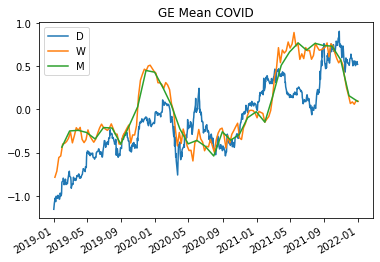

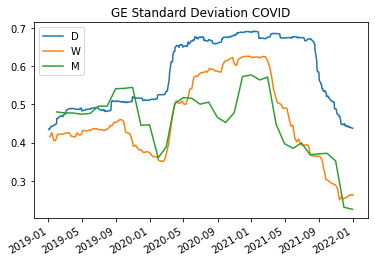

In [48]:
#visualize a little bit better the period of COVID 19 

#visualize the rolling windows estimations
for n in newdata.columns:    
    #test to see if it works
    mean_from_daily.loc[mean_from_daily.index > "2019-01-01"][n].plot(label="D")
    mean_from_weekly.loc[mean_from_weekly.index > "2019-01-01"][n].plot(label="W")
    mean_from_monthly.loc[mean_from_monthly.index > "2019-01-01"][n].plot(label="M") 
    plt.legend()
    plt.title(f"{n} Mean COVID")
    plt.show()

    #test to see if it works
    std_from_daily.loc[std_from_daily.index > "2019-01-01"][n].plot(label="D")
    std_from_weekly.loc[std_from_weekly.index > "2019-01-01"][n].plot(label="W")
    std_from_monthly.loc[std_from_monthly.index > "2019-01-01"][n].plot(label="M") 
    plt.legend()
    plt.title(f"{n} Standard Deviation COVID")
    plt.show()

    
    

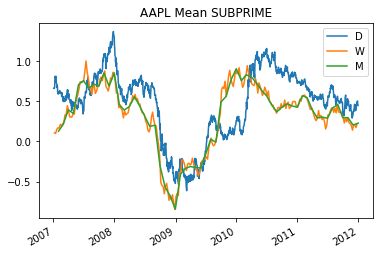

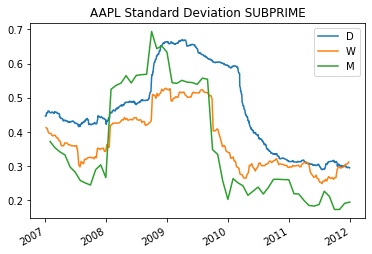

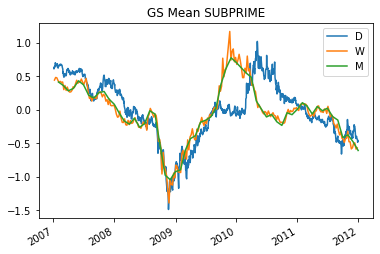

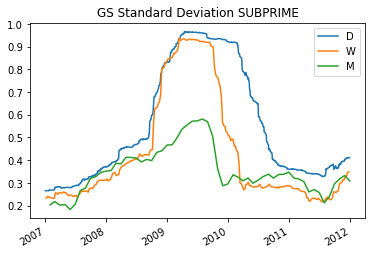

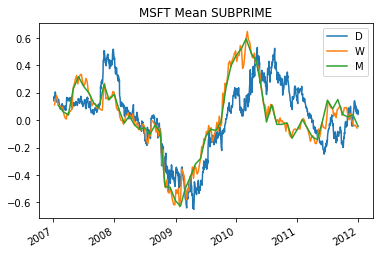

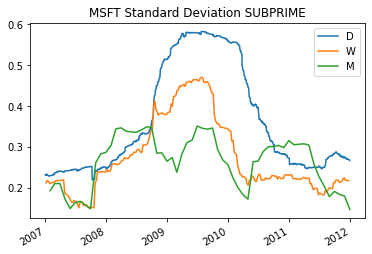

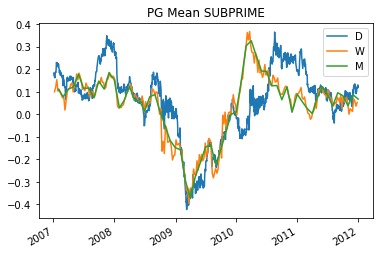

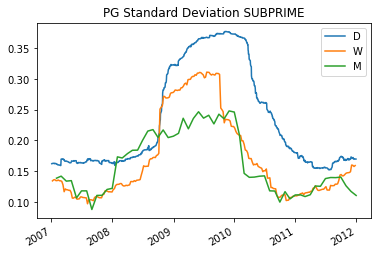

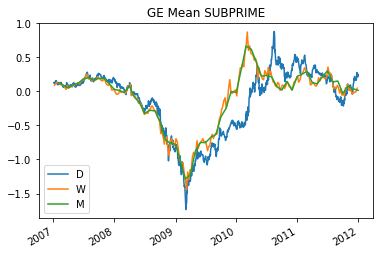

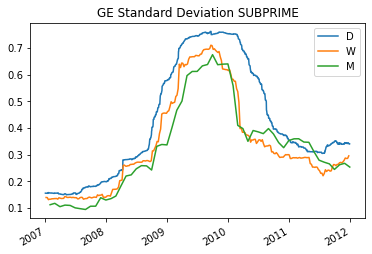

In [51]:

#visualize a little bit better the period of subprime crisis in 2008
def subprime_period(dataset):
    up = dataset.loc[dataset.index > "2007-01-01"]
    return up.loc[up.index < "2012-01-01"]

for n in newdata.columns:
    subprime_period(mean_from_daily)[n].plot(label="D")
    subprime_period(mean_from_weekly)[n].plot(label="W")
    subprime_period(mean_from_monthly)[n].plot(label="M") 
    plt.legend()
    plt.title(f"{n} Mean SUBPRIME")
    plt.show()

    #test to see if it works
    subprime_period(std_from_daily)[n].plot(label="D")
    subprime_period(std_from_weekly)[n].plot(label="W")
    subprime_period(std_from_monthly)[n].plot(label="M") 
    plt.legend()
    plt.title(f"{n} Standard Deviation SUBPRIME")
    plt.show()